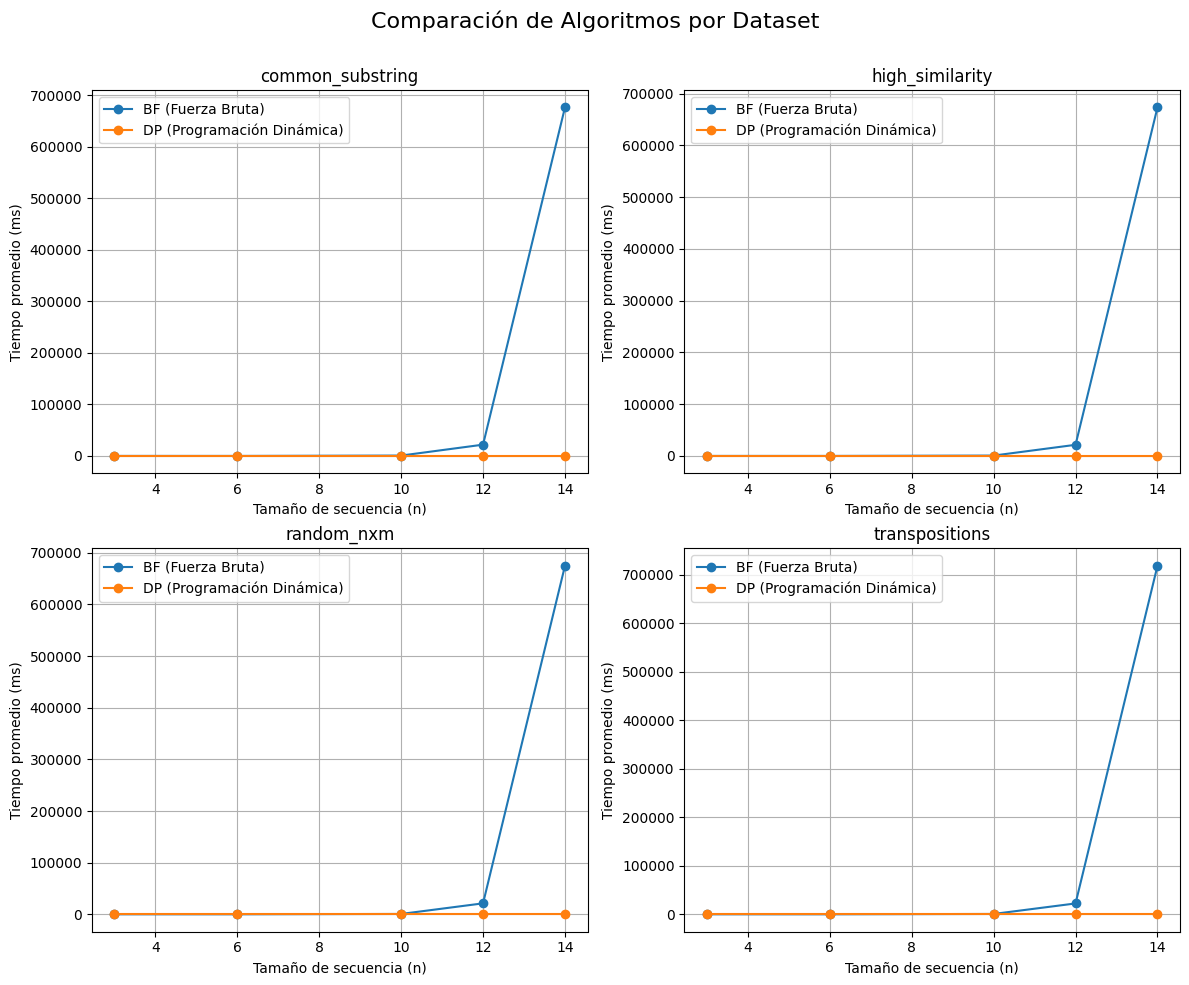

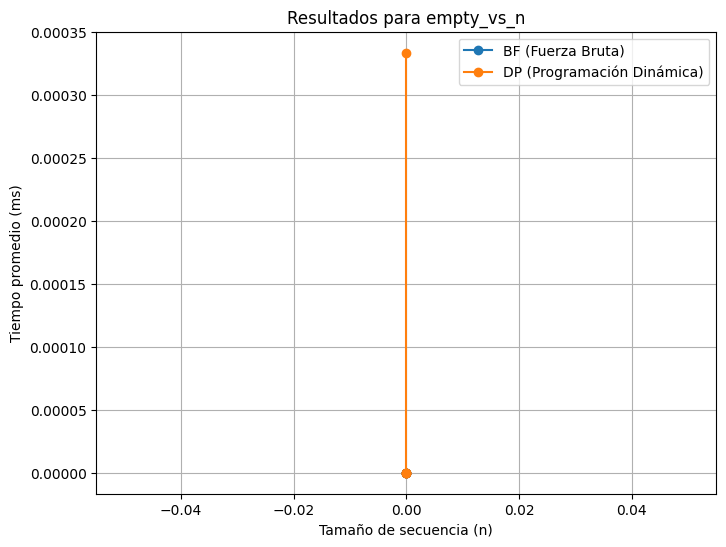

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = "resultados_comun.csv"
data = pd.read_csv(file_path)

# Calcular promedios por dataset y tamaño
grouped = data.groupby(['subdataset', 'tipo_dataset', 'tamanioS1', 'tamanioS2']).mean().reset_index()

# Listar los datasets únicos
datasets = grouped['tipo_dataset'].unique()

# Filtrar datasets por grupos
datasets_main = ["common_substring", "high_similarity", "random_nxm", "transpositions"]
dataset_empty = "empty_vs_n"

# Preparar subplots para los datasets principales (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, dataset in enumerate(datasets_main):
    dataset_data = grouped[grouped['tipo_dataset'] == dataset]

    # Extraer datos para el gráfico
    tamanios = dataset_data['tamanioS1']
    tiempo_bf = dataset_data['tiempo_bf']
    tiempo_dp = dataset_data['tiempo_dp']

    # Graficar en el subplot correspondiente
    ax = axes[i]
    ax.plot(tamanios, tiempo_bf, label="BF (Fuerza Bruta)", marker='o')
    ax.plot(tamanios, tiempo_dp, label="DP (Programación Dinámica)", marker='o')

    ax.set_title(f"{dataset}")
    ax.set_xlabel("Tamaño de secuencia (n)")
    ax.set_ylabel("Tiempo promedio (ms)")
    ax.legend()
    ax.grid(True)

# Ajustar diseño de subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle("Comparación de Algoritmos por Dataset", fontsize=16)

# Gráfico independiente para empty_vs_n
fig_empty, ax_empty = plt.subplots(figsize=(8, 6))

dataset_empty_data = grouped[grouped['tipo_dataset'] == dataset_empty]

# Extraer datos para el gráfico independiente
tamanios_empty = dataset_empty_data['tamanioS1']
tiempo_bf_empty = dataset_empty_data['tiempo_bf']
tiempo_dp_empty = dataset_empty_data['tiempo_dp']

# Graficar
ax_empty.plot(tamanios_empty, tiempo_bf_empty, label="BF (Fuerza Bruta)", marker='o')
ax_empty.plot(tamanios_empty, tiempo_dp_empty, label="DP (Programación Dinámica)", marker='o')

ax_empty.set_title("Resultados para empty_vs_n")
ax_empty.set_xlabel("Tamaño de secuencia (n)")
ax_empty.set_ylabel("Tiempo promedio (ms)")
ax_empty.legend()
ax_empty.grid(True)

plt.show()



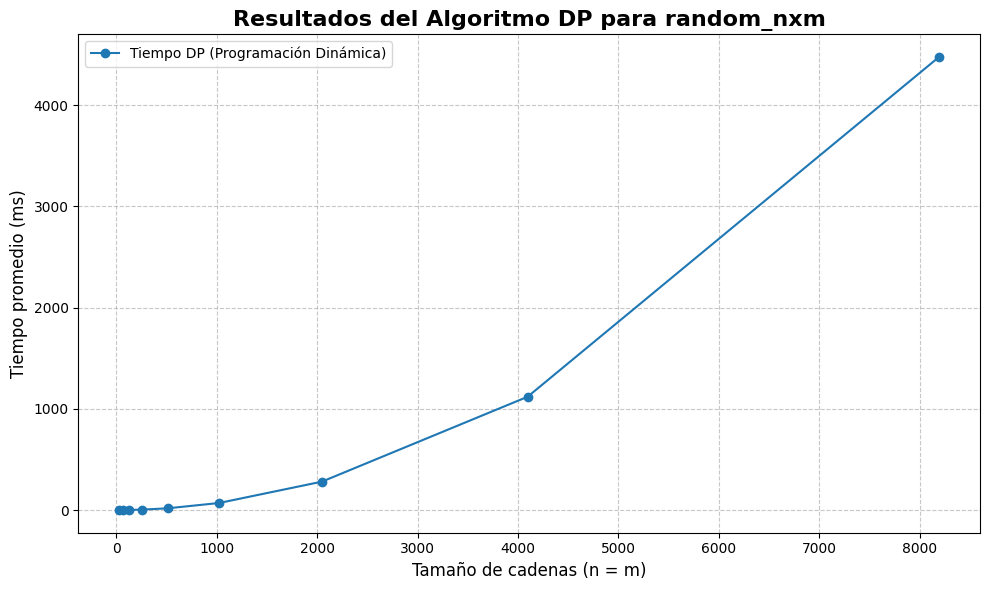

In [ ]:
file_path = "resultados_dp.csv"
data = pd.read_csv(file_path)

data['tamanioS1'] = pd.to_numeric(data['tamanioS1'], errors='coerce')
data['tamanioS2'] = pd.to_numeric(data['tamanioS2'], errors='coerce')
data['tiempo_dp'] = pd.to_numeric(data['tiempo_dp'], errors='coerce')

# Calcular los promedios para cada tamaño de cadena
grouped = data.groupby(['tamanioS1', 'tamanioS2']).mean(numeric_only=True).reset_index()

# Extraer datos para el gráfico
tamanios = grouped['tamanioS1']
tiempo_dp = grouped['tiempo_dp']

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(tamanios, tiempo_dp, marker='o', label="Tiempo DP (Programación Dinámica)")

# Configurar el gráfico
plt.title("Resultados del Algoritmo DP para random_nxm", fontsize=16, weight='bold')
plt.xlabel("Tamaño de cadenas (n = m)", fontsize=12)
plt.ylabel("Tiempo promedio (ms)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()
